In [1]:
from google.colab import files
files.upload()

Saving Celsius+to+Fahrenheit.csv to Celsius+to+Fahrenheit.csv


{'Celsius+to+Fahrenheit.csv': b'Celsius,Fahrenheit\r\n-50,-58\r\n-40,-40\r\n-30,-22\r\n-20,-4\r\n-10,14\r\n-9,15.8\r\n-8,17.6\r\n-7,19.4\r\n-6,21.2\r\n-5,23\r\n-4,24.8\r\n-3,26.6\r\n-2,28.4\r\n-1,30.2\r\n0,32\r\n1,33.8\r\n2,35.6\r\n3,37.4\r\n4,39.2\r\n5,41\r\n6,42.8\r\n7,44.6\r\n8,46.4\r\n9,48.2\r\n10,50\r\n20,68\r\n30,86\r\n40,104\r\n50,122\r\n60,140\r\n'}

In [2]:
import pandas as pd

data = pd.read_csv("Celsius+to+Fahrenheit.csv")

In [3]:
data.head()

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Celsius     30 non-null     int64  
 1   Fahrenheit  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [5]:
x_train = data["Celsius"]
y_train = data["Fahrenheit"]

In [9]:
x_train.shape

(30,)

In [18]:
# creating a deep learning model 

import tensorflow as tf
from tensorflow.keras import layers


model = tf.keras.Sequential([
                             layers.Dense(1 , activation= "relu", input_shape = [1])
])







In [19]:

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(
    loss= tf.keras.losses.mean_squared_error,
    optimizer = tf.keras.optimizers.Adam(0.5),
    metrics = ["mse"]
)

In [42]:
model_hist = model.fit(x_train, y_train, epochs = 200)

Epoch 1/200
1/1 [==============================] - 0s 273ms/step - loss: 777.8676 - mse: 777.8676
Epoch 2/200
1/1 [==============================] - 0s 4ms/step - loss: 649.6599 - mse: 649.6599
Epoch 3/200
1/1 [==============================] - 0s 4ms/step - loss: 664.0400 - mse: 664.0400
Epoch 4/200
1/1 [==============================] - 0s 9ms/step - loss: 691.7463 - mse: 691.7463
Epoch 5/200
1/1 [==============================] - 0s 4ms/step - loss: 671.1139 - mse: 671.1139
Epoch 6/200
1/1 [==============================] - 0s 5ms/step - loss: 632.1501 - mse: 632.1501
Epoch 7/200
1/1 [==============================] - 0s 15ms/step - loss: 604.6238 - mse: 604.6238
Epoch 8/200
1/1 [==============================] - 0s 3ms/step - loss: 599.3263 - mse: 599.3263
Epoch 9/200
1/1 [==============================] - 0s 5ms/step - loss: 605.1868 - mse: 605.1868
Epoch 10/200
1/1 [==============================] - 0s 6ms/step - loss: 604.0300 - mse: 604.0300
Epoch 11/200
1/1 [==================

In [43]:
model_hist.history.keys()

dict_keys(['loss', 'mse'])

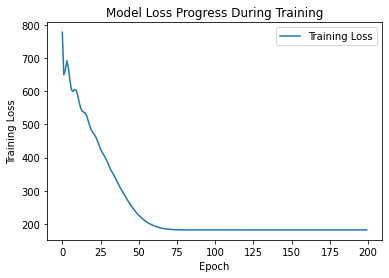

In [44]:
import matplotlib.pyplot as plt

plt.plot(model_hist.history["loss"])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])


In [45]:
model.get_weights()


[array([[1.7999496]], dtype=float32), array([32.003063], dtype=float32)]

In [46]:
temp_in_celsius = 0

temp_in_fahrenheit = model.predict([temp_in_celsius])

print(f"Temperature in Fahrenheit: {temp_in_fahrenheit}")

Temperature in Fahrenheit: [[32.003063]]


In [47]:
temp_in_fah_from_eq = 9/5 * temp_in_celsius + 32

print(f"Temperature in Fahrenheit from the equation : {temp_in_fah_from_eq}")

Temperature in Fahrenheit from the equation : 32.0
